# Effects of Ride Characteristics on their Duration
## by Abhijeet Kothari

## Investigation Overview

In this investigation, I wanted to look at the characteristics of rides that could be used to predict their duration of the ride. The main focus was on the five features: distance, day of trip, usertype, gender, age and age group.

## Dataset Overview

The data consisted of durations and attributes of approximately 5,19,700 ride details. The attributes included the five features: distance, day of trip, usertype, gender, age and age group as well as additional measurements such as start station name, end station name, bike code etc. Around 11000 data points were removed from the analysis due to inconsistencies or missing information.

In [136]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2,radians

%matplotlib inline

In [137]:
#loading data set into the dataframe
ford_go_bike=pd.read_csv('2017-fordgobike-tripdata.csv')

In [138]:
ford_go_bike.dropna(inplace=True)

In [139]:
ford_go_bike['start_time']=pd.to_datetime(ford_go_bike.start_time)
ford_go_bike['end_time']=pd.to_datetime(ford_go_bike.end_time)

ford_go_bike['member_birth_year']=ford_go_bike.member_birth_year.astype(str)
ford_go_bike['member_birth_year']=ford_go_bike.member_birth_year.apply(lambda x: x[:-2])  #removing decimal precision

ford_go_bike['user_type'] = ford_go_bike.user_type.astype('category')
ford_go_bike['member_gender'] = ford_go_bike.member_gender.astype('category')

In [140]:
#saving index of all the entries
indexes_to_be_deleted=ford_go_bike[ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x)>100)].index

In [141]:
#deleting rows
ford_go_bike.drop(index=indexes_to_be_deleted,inplace=True)

In [142]:
#1) create a new variable "distance", calculated using latitude and longitude of start point and end point
def calculate_distance(df):
    R = 6378.0 #radius of the earth

    lat1 = radians(df['start_station_latitude'])
    lon1 = radians(df['start_station_longitude'])
    lat2 = radians(df['end_station_latitude'])
    lon2 = radians(df['end_station_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c 
    return distance

ford_go_bike['distance_in_km'] = ford_go_bike.apply(calculate_distance,axis=1)

In [143]:
#2) create one column for age
ford_go_bike['age']=ford_go_bike.member_birth_year.apply(lambda x: 2017-int(x))

In [144]:
#3) create one column for age_group
def assign_age_group(age):
    
    age_group=np.nan
    
    if age<18:
        age_group='Under 18'
    
    elif 18<=age<=35:
        age_group='18-35'
    
    elif 36<=age<=54:
        age_group='36-54'

    else:
        age_group='55 or more'
    
    return age_group

ford_go_bike['age_group']=ford_go_bike.age.apply(assign_age_group)

In [145]:
#convert 'duration_sec' into minutes for better interpretibility and aslo changing column name
ford_go_bike.duration_sec=ford_go_bike.duration_sec.apply(lambda x: x/60)
ford_go_bike.rename(columns={'duration_sec':'duration_in_min'},inplace=True)

In [146]:
#fixing values present in 'duration-in_min' column for index 166700,167167,167759
ford_go_bike.loc[166700,'duration_in_min']=1350.66
ford_go_bike.loc[167167,'duration_in_min']=1185.63
ford_go_bike.loc[167759,'duration_in_min']=797.23

## Distribution of Ride Durations

Between the range of 1 min and 100 mins, almost all of the ride duration falls. It's peak value is on 10 mins.

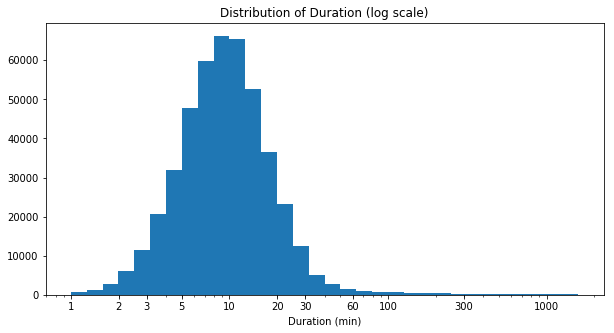

In [147]:
# plot is right skewed let's reconstruct plot again with applying log scale transformation on x axis
plt.figure(figsize=(10,5))
bins=10**np.arange(0,np.log10(ford_go_bike.duration_in_min.max())+0.1,0.1)
plt.hist(data=ford_go_bike,x='duration_in_min',bins=bins);
plt.xscale('log')
x_ticks=[1,2,3,5,10,20,30,60,100,300,1000]
plt.xticks(x_ticks,x_ticks);
plt.xlabel('Duration (min)');
plt.title('Distribution of Duration (log scale)');


In [148]:
#let's remove all the rows where distance is 0
ford_go_bike=ford_go_bike[~(ford_go_bike.distance_in_km==0)]

## Distribution of Distance

Almost all the distances fall between 200 meters and 8 kms.Peak of the curve is between 1 and 2 kms.

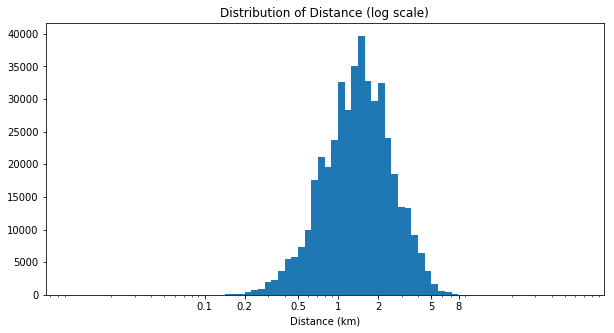

In [149]:
# plot is right skewed let's reconstruct plot again with applying log scale transformation on x axis
plt.figure(figsize=(10,5))
bins=10**np.arange(-2,np.log10(ford_go_bike.distance_in_km.max())+0.05,0.05)
plt.hist(data=ford_go_bike,x='distance_in_km',bins=bins);
plt.xscale('log')
x_ticks=[0.1,0.2,0.5,1,2,5,8]
plt.xticks(x_ticks,x_ticks);
plt.xlabel('Distance (km)');
plt.title('Distribution of Distance (log scale)');

## Duration vs Distance

*    Two curves in the graph. The first curve (vertically lower) suggests that as distance increases, duration does increases although not lineraly. And the second curve (vertically upper) suggests that as distance increases, duration descreses although not lineraly. And the result of these two curves mix each other an gives 0.1 as the value of r.


*    For the small distance(distance in the range of 0-3kms), the duration for rides vary too much.

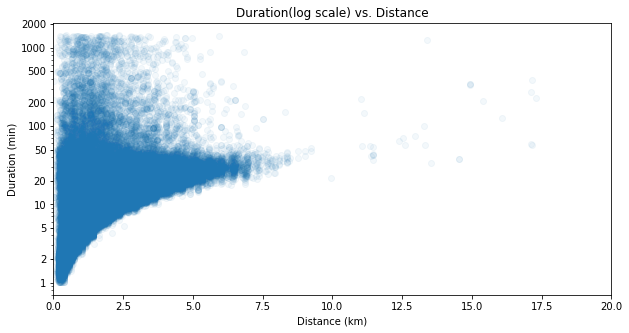

In [165]:
# scatter plot of duration vs. distance (with complete data)
plt.figure(figsize = [10, 5])
#Applying log transformation on y scale
plt.scatter(data = ford_go_bike, x = 'distance_in_km', y = 'duration_in_min',alpha=1/20)
plt.xlim([0, 20])
plt.xlabel('Distance (km)')
plt.yscale('log')
plt.yticks([1,2,5,10,20,50,100,200,500,1000,2000], [1,2,5,10,20,50,100,200,500,1000,2000])
plt.ylabel('Duration (min)')
plt.title('Duration(log scale) vs. Distance');



In [166]:
# compute the logarithm of duration to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

ford_go_bike['log_duration_in_min'] = ford_go_bike['duration_in_min'].apply(log_trans)

## Duration vs Day of Ride

Average duration time of rides on weekends are higher to rides on weekdays. 

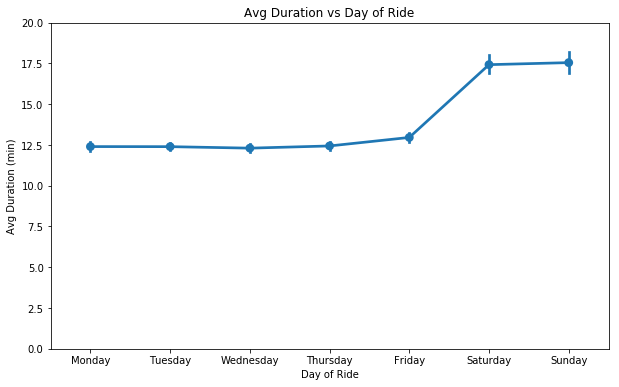

In [167]:
#plotting weekdays on which trips took place

#creating one column for day of week
ford_go_bike['start_day']=ford_go_bike.start_time.dt.day_name()

#ordering
level_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
ford_go_bike['start_day'] = ford_go_bike['start_day'].astype(ordered_cat)


# bivariate plots of duration vs. start day of trip

plt.figure(figsize=(10,6))
color=sb.color_palette()[0]

#pointplot
sb.pointplot(data=ford_go_bike,x='start_day',y='duration_in_min',color=color);
plt.ylim(0,20);
plt.xlabel('Day of Ride')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs Day of Ride');


## Duration vs User Type

Average duration for customer type users is higher than avg duration for subscriber type users. Where avg duration for customer is near to 30, it remains on 12 for subscriber.

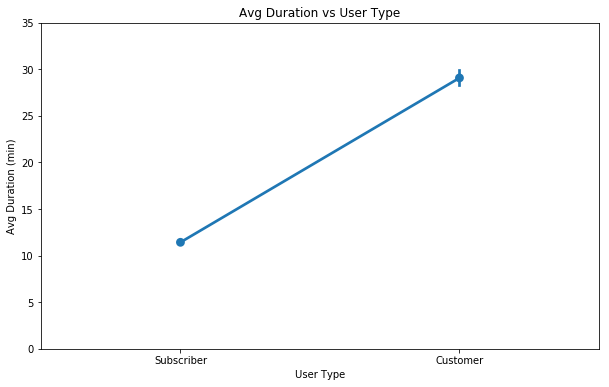

In [158]:
# bivariate plots of duration vs. user type

plt.figure(figsize=(10,6))
color=sb.color_palette()[0]


#pointplot
sb.pointplot(data=ford_go_bike,x='user_type',y='duration_in_min',color=color,order=['Subscriber','Customer']);
plt.ylim(0,35);
plt.xlabel('User Type')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs User Type');


## Duration vs Gender

For Female users, average duration time is highest. Followed by other gender users and male users.

Text(0.5, 1.0, 'Avg Duration vs Gender')

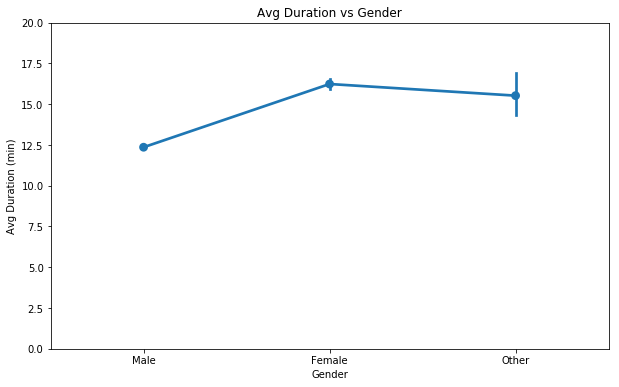

In [168]:
# bivariate plots of duration vs gender

plt.figure(figsize=(10,6))
color=sb.color_palette()[0]

#pointplot
sb.pointplot(data=ford_go_bike,x='member_gender',y='duration_in_min',color=color,order=['Male','Female','Other']);
plt.ylim(0,20);
plt.xlabel('Gender')
plt.ylabel('Avg Duration (min)')
plt.title('Avg Duration vs Gender')


## Duration vs Distance by Gender

Males have high ride duration for samller distance for 0-3kms (They do take less time too for the same duration ).This effect fades away if move from male to other gender.

Text(0.5, 0.98, 'Duration vs Distance by Gender')

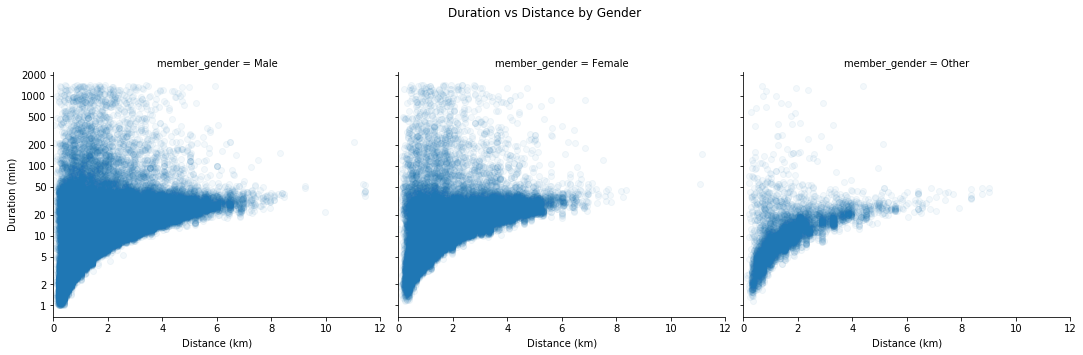

In [169]:
#duration vs distance vs gender
g=sb.FacetGrid(data=ford_go_bike,col='member_gender',col_order=['Male','Female','Other'],height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by Gender')


## Duration vs Distance by User Type

Customer type users have high ride duration for samller distance like 0-3kms (They do take less time too for the same duration ).This effect is less for subscriber type users

Text(0.5, 0.98, 'Duration vs Distance by User Type')

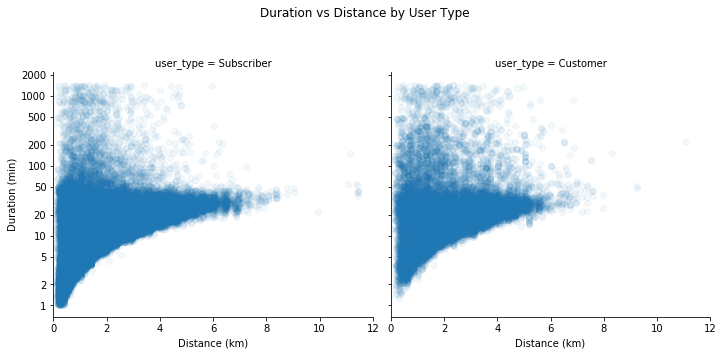

In [161]:
#duration vs distance vs user_type
g=sb.FacetGrid(data=ford_go_bike,col='user_type',col_order=['Subscriber','Customer'],height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by User Type')




## Duration vs Distance by Age Group

Users in age group 18 to 35 range have high ride duration for samller distance like 0-3kms (They do take less time too for the same duration ).This effect fades away if we move to older age groups.

Text(0.5, 0.98, 'Duration vs Distance by Age Group')

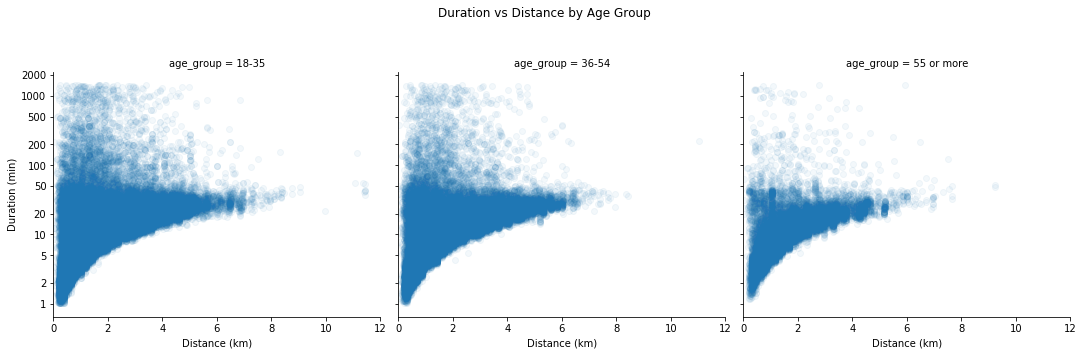

In [162]:
#duration vs distance vs age_group
g=sb.FacetGrid(data=ford_go_bike,col='age_group',height=5)
g.map(plt.scatter,'distance_in_km','log_duration_in_min',alpha=1/20);
plt.yticks(np.log10([1,2,5,10,20,50,100,200,500,1000,2000]), [1,2,5,10,20,50,100,200,500,1000,2000]);
plt.xlim(0,12);
g.set_xlabels('Distance (km)');
g.set_ylabels('Duration (min)');

#setting title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Duration vs Distance by Age Group')